<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/RNN_basic(Embedding%2C_LSTM%2C_Conv1D%2C_BERT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

순환 신경망(RNN, Recurrent Neural Network)은 컨볼루션 신경망과 함께 딥러닝의 양대 산맥을 이루는 신경망으로, 대표적으로 음성을 인식하거나 네이버 파파고와 구글 번역기처럼 문장을 번역하는데 사용할 수 있다. 또 주식, 온도, 매출과 같이 시간이 지남에 따라 변화하는 데이터를 활용하여 미래 주식 종가, 날씨, 상점 매출을 예측할 수 있다.

여기서는 케라스가 제공하는 대표적인 4개의 층(Embedding, SimpleRNN, LSTM, Conv1D)에 관해 알아보도록 한다.

# 1. Embedding

Embedding층은 수많은 단어(또는 데이터)를 벡터 형태로 표현할 수 있기 때문에 텍스트 분류를 위해 사용하는 가장 기본에 해당한다. 또한, 컨볼루션층이 사전 학습된 가중치를 사용하는 것과 같이 Embedding층도 사전 학습된 가중치를 불러와 사용할 수 있다.

## 1) 원리 이해하기

텍스트 데이터를 분류하기 위해서 자주 접할 수 있는 용어 중 하나는 토큰(Token)이다. 토큰은 문법적으로 더 이상 나눌 수 없는 언어 요소를 의미한다. 이를 수행하는 작업을 토큰화(Tokenizer)라고 한다. 텍스트 데이터를 신경망에 입력하기 위해서 일반적으로 토큰화 작업을 수행하고 정의된 토큰에 고유 인덱스를 부여한 뒤, 인코딩을 통해 적절한 형태로 바꿔주는 전처리 작업 과정을 거치게 된다. 인코딩 방법은 대표적으로 원-핫 인코딩, 이진 인코딩이 있다. 텍스트 데이터를 사용하는 경우엔 기본적으로 Embedding층을 사용한다. 이를 워드 임베딩(Word Embedding)이라고 표현한다.

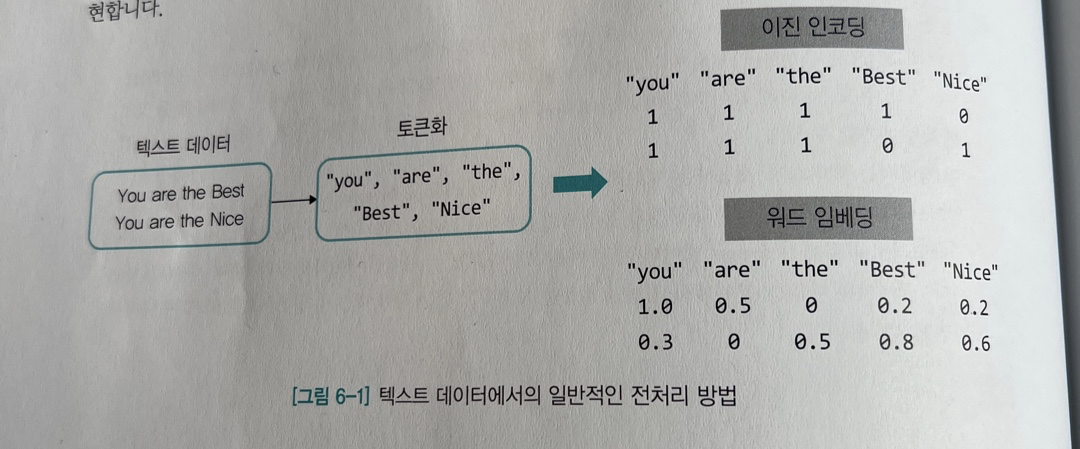

코드를 통해 토큰화 작업을 수행하도록 한다. tensorflow.keras.preprocessing.text에는 텍스트 데이터를 위한 여러 가지 전처리 함수가 포함되어 있다.

In [1]:
# 토큰화 작업 수행하기
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best',
        'You are the Nice']


tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스로 변환한다.
sequences = tokenizer.texts_to_sequences(texts)

In [2]:
tokenizer

In [3]:
tokenizer.word_index

{'<OOV>': 1, 'are': 3, 'best': 5, 'nice': 6, 'the': 4, 'you': 2}

In [4]:
print(f'sequences: {sequences}')

sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]


In [5]:
# 이진 형태로 인코딩한다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode='binary')

print(f'binary_vectors: \n {binary_results}\n')

binary_vectors: 
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]



In [6]:
# 원-핫 형태로 인코딩한다.
print(to_categorical(sequences))

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [7]:
test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

In [8]:
print(f'test sequences: {test_seq}')

test sequences: [[2, 3, 4, 1]]


먼저 Tokenizer() 함수를 통해 최대 단어 개수를 지정한다. 만약 테스트에서 주어진 문장에 포함되지 않은 단어가 존재할 경우, oov_token 인자에 전달된 OOV Out Of Vocabulary 단어로 대체합니다. 마지막 테스트용 문장 'You are the One'을 입력했을 때, 기존 문장에 존재하지 않는 단어 One을 OOV로 대체하고 숫자 1로 변환한 것을 볼 수 있습니다.

texts_to_sequences() 함수는 토큰화를 통해 각 토큰에 부여된 인덱스를 활용하여 주어진 문장에 존재하는 단어를 인덱스로 변환한다. 공통 문장인 'You are the'는 [2, 3, 4], 'Best'와 'Nice'는 각각 5와 6으로 변환되었다.

이렇게 변환된 상태에서 sequences_to_matrix() 함수를 사용하면 이진 형태로 인코딩된 결과를 얻을 수 있다.

to_categorical() 함수를 사용하면 원-핫 형태로 인코딩된 결과를 얻게 된다. 이러한 방법에서 얻을 수 있는 벡터를 희소행렬(Sparse Matrix)이라고 표현한다. 반대로 다음에 알아볼 Embedding층은 밀집행렬(Dense Matrix)로 표현한다.

 - **희소행렬** : 존재하는 단어의 인덱스를 제외하고 전부 0으로 표현한다. 희소행렬은 고차원에 해당하며, 단어의 유사성(similarity)를 표현할 수 없다. 학습에 부정적인 영향을 끼치는 행렬의 고차원은 불필요한 계산이 추가되며, 차원의 저주(Curse of dimensionality)를 야기한다. 차원의 저주란 고차원으로 나아갈수록 학습 데이터가 희소해지는 현상을 말한다.

 - **밀집행렬** : 각 단어의 관계를 실수로 표현하며, 저차원에 해당한다. 행렬에 속해있는 각 실숫값은 0과 1로 직접 지정해주는 희소행렬과 다르게 데이터를 기반으로 조정된다. 학습이 적절하게 진행되었다면, 유사한 의미를 가지는 단어는 비슷한 공간에 표현될 것이다.

## 2) 데이터 살펴보기

앞서 텍스트 데이터를 다룰 때 접할 수 있는 기본 용어를 살펴보았다. 이제 IMDB 데이터셋에 Embedding층을 사용해보도록 한다. 전처리 과정이 전부 수행된 상태의 데이터이다.

In [9]:
# 데이터셋 다운로드
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

17473536/17464789 [==============================] - 0s 0us/step


num_words는 데이터셋에서 가장 빈번하게 사용되는 단어의 개수를 나타낸다. 여기서는 10,000개의 단어만 사용하도록 한다. 학습 데이터와 테스트 데이터는 다음 예제 코드에서 출력되는 형태에서 볼 수 있듯이 5:5 비율로 나뉘어 반환된다.

In [10]:
# 데이터 형태 확인하기
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


전처리 과정이 수행된 첫 번째 데이터와 레이블을 확인해본다. x_train[0]에서 볼 수 있는 숫자는 빈번하게 사용되는 정도를 나타낸다. 1은 데이터셋에서 가장 빈번하게 사용되는 단어, 10은 10번째로 빈번하게 사용되는 단어를 의미한다. 또한, 첫 번째 레이블(y_train[0])은 긍정적인 리뷰임을 확인할 수 있다. 1은 긍정, 0은 부정적인 리뷰를 나타낸다.

In [11]:
# 첫 번째 데이터 확인하기
print(x_train[0])
print('--------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
--------
1


In [12]:
# IMDB 데이터셋에서 가장 빈번하게 사용되는 세 개의 단어
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key

for i in range(1, 4):
  print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1654784/1641221 [==============================] - 0s 0us/step
1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


In [13]:
imdb.get_word_index().items()

dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016), ('hahahah', 68804), ("wood'", 52017), ('transvestism', 40833), ("hangin'", 34702), ('bringing', 2338), ('seamier', 40834), ('wooded', 34703), ('bravora', 52018), ('grueling', 16817), ('wooden', 1636), ('wednesday', 16818), ("'prix", 52019), ('altagracia', 34704), ('circuitry', 52020), ('crotch', 11585), ('busybody', 57766), ("tart'n'tangy", 52021), ('burgade', 14129), ('thrace', 52023), ("tom's", 11038), ('snuggles', 52025), ('francesco', 29114), ('complainers', 52027), ('templari

In [14]:
imdb_get_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

Embedding 층을 사용하기 위해서는 시퀀스 데이터(여기서는 문장을 나타낸다)의 길이가 전부 동일해야 한다. 이를 위해 pad_sequences() 함수를 사용한다. 이 함수는 해당 데이터가 지정해준 길이보다 짧은 경우 0으로 채워 넣으며, 긴 경우는 잘라낸다.

In [15]:
# 데이터를 동일한 길이로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 500

print('Before pad_sequences :', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

print('After pad_sequences: ', len(pad_x_train[0]))

Before pad_sequences : 218
After pad_sequences:  500


In [16]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

3pad_x_train[0]을 출력해보면 원래 단어의 앞에 '지정해준 단어의 길이 - 원래 단어의 길이'(500, 218)만큼 0이 추가된 것을 볼 수 있다. 단어의 뒤에 패딩을 추가하고 싶다면, padding 인자를 post로 지정한다. (여기서는 pre라 앞에 있다).

## 3) 모델 구성

Embedding층은 모델의 첫 번째 층으로만 사용할 수 있으며, 주로 순환 신경망과 연결하여 사용한다. (batch_size, sequence_length) 형태를 입력으로 받으며, (batch_size, sequence_length, output_dim) 형태를 출력한다.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
#이 층은 모델의 제일 첫 번째층으로만 사용할 수 있다.
# Flatten층을 사용하기 위해 input_length를 전달한다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['acc'])

여기서는 Embedding층 이후에 Dense층을 연결했다. 이를 위해 input_length 인자를 사용하여 출력 크기를 지정해주고, Dense층과의 연결을 위해 Flatten층을 사용하도록 한다. 여기서는 직접 지정한 데이터의 최대 길이인 500(max_len)을 사용한다. 또한, input_length 인자는 Embedding층과 연결된 층이 순환 신경망일 경우에는 사용하지 않는다.

input_dim 인자는 학습 데이터셋에서 사용한 단어의 개수(10,000), output_dim 인자는 임베딩 벡터의 크기(32)를 나타낸다. 이와 같이 인자를 설정하고 나면 Embedding층은 (None, 500, 32) 형태의 출력을 가지게 된다. 500은 입력값의 길이를 지정했던 max_len의 길이와 같으며, 32는 임베딩 벡터의 크기와 같다. model.summary() 함수를 통해 모델 구조의 형태를 살펴볼 수 있다.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


## 4) 모델 학습하고 평가하기


In [19]:
# 모델 학습시키기
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 8s 7ms/step - loss: 0.4600 - acc: 0.7710 - val_loss: 0.2895 - val_acc: 0.8818
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 0.2010 - acc: 0.9261 - val_loss: 0.2743 - val_acc: 0.8836
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 0.1093 - acc: 0.9682 - val_loss: 0.2991 - val_acc: 0.8816
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0540 - acc: 0.9898 - val_loss: 0.3241 - val_acc: 0.8752
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0253 - acc: 0.9973 - val_loss: 0.3360 - val_acc: 0.8788
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0126 - acc: 0.9993 - val_loss: 0.3582 - val_acc: 0.8808
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0068 - acc: 0.9998 - val_loss: 0.3864 - val_acc: 0.8776
Epoch 8/30
625/625 [==============================] - 4s 6ms/step - loss: 0.

model.fit()에서 새로운 인자인 validation_split을 사용했다. validation_split 인자는 학습 데이터의 끝에서 해당 비율만큼 떼어내어 검증 데이터셋으로 활용한다. 여기서는 0.2로 학습 데이터의 20% 비율만큼 검증 데이터로 활용한다. 데이터에서 무작위로 20%의 비율만큼 뽑지 않고, 단순하게 학습 데이터의 끝에서 떼어낸다는 점에 주의해야 한다.

In [20]:
# 모델 평가
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8121 - acc: 0.8718


[0.812117338180542, 0.8718400001525879]

모델 평가를 통해 얻은 정확도는 87%로 매우 가까운 값을 얻었다.

In [24]:
# 학습 과정 확인하기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

acc = his_dict['acc']
val_acc = his_dict['val_acc']

epochs = range(1, len(loss) + 1)

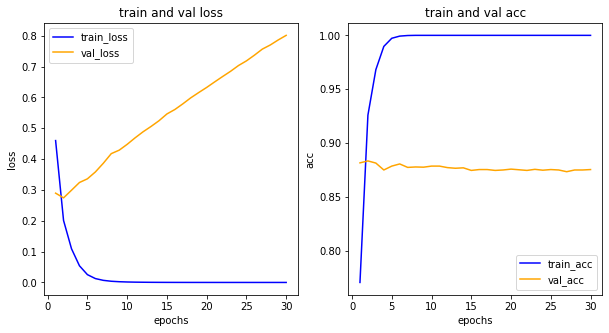

In [25]:
# 학습 및 검증 손실 그리기
fig = plt.figure(figsize= (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color ='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# 2. RNN

Embedding층은 단순하게 데이터의 표현을 학습하여 데이터 사전을 구축하는 것으로 이해하면 쉽다. 하지만 유사한 의미의 단어를 비슷한 공간에 매핑할 수 있지만, 시퀀스 데이터의 중요한 특성인 순서와 맥락까지 고려한 것은 아니다. 순환 신경망은 이 문제를 해결하기 위해 고안된 층이다.


## 1) 원리 이해하기

**순환 신경망(RNN, Recurrent Neural Network)**은 완전연결층, 컨볼루션 신경망의 반대되는 개념으로 설명할 수 있다. 완전연결층과 컨볼루션 신경망은 **피드 포워드 네트워크(feed-forward network)**라고 표현한다. 피드 포워드 네트워크는 신경망이 가지는 모든 출력값이 마지막층인 출력층을 향한다. **하지만 순환 신경망은 각 층의 결괏값이 출력층을 향하면서도 동시에 현재 층의 다음 계산에 사용된다.**

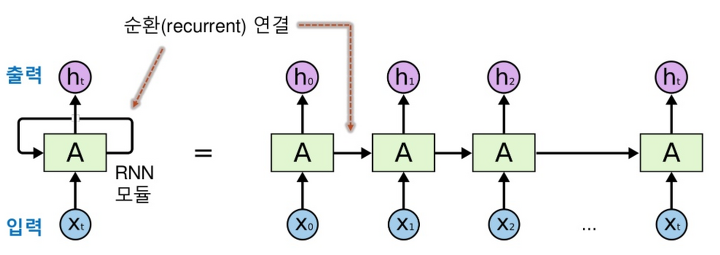

순환 신경망은 노드가 출력값을 반환하는 동시에 이전 상태(state)를 기억하는 메모리 역할을 수행하며, 이를 RNN 셀이라 한다. 또한, RNN 셀의 상태를 은닉 상태(hidden state)라고 한다.

위 그림에서 x는 입력, h는 출력을 나타내고, t는 현재 시점을 의미한다. 현재 시점 t에서 은닉 상태는 이전 시점 t-1의 은닉 상태를 활용하여 업데이트된다. 이를 표현한 의사코드(pseudocode)는 아래와 같다.

의사코드(슈도코드, pseudocode)는 프로그램을 작성할 때 각 모듈이 작동하는 논리를 표현하기 위한 언어이다. 특정 프로그래밍 언어의 문법에 따라 쓰인 것이 아니라, 일반적인 언어로 코드를 흉내 내어 알고리즘을 써놓은 코드를 말한다. 의사(疑似)코드는 말 그대로 흉내만 내는 코드이기 때문에, 실제적인 프로그래밍 언어로 작성된 코드처럼 컴퓨터에서 실행할 수 없으며, 특정 언어로 프로그램을 작성하기 전에 알고리즘의 모델을 대략적으로 모델링하는 데에 쓰인다.



In [26]:
'''

# 순환 신경망을 표현한 의사코드
state_t = 0 # 초기 상태
# 각 시점에 해당하는 입력을 반복한다.
for input_t in input_sequence:
  # 입력과 은닉상태를 활성화 함수에 통과시킨다.
  output_t = activation_func(input_t, state_t)
  # 출력값은 다음 시점을 위한 은닉 상태가 된다.
  state_t = output_t

'''

NameError: ignored

순환 신경망은 이전 상태를 사용한다는 점에서 약간 추상적일 수 있다.

다시 한번 강조하면, 순환 신경망은 이전 시점의 은닉 상태를 참고하여 현재 시점의 상태를 만들게 된다. 즉, 과거의 정보를 이용하여 현재의 상태를 업데이트한다는 의미이다.